In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/iris.csv", 
    na_values=['NA', '?'])

In [ ]:
df

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df2=df.drop(["species"],axis=1)

In [ ]:
df2

,sepal_l,sepal_w,petal_l,petal_w
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


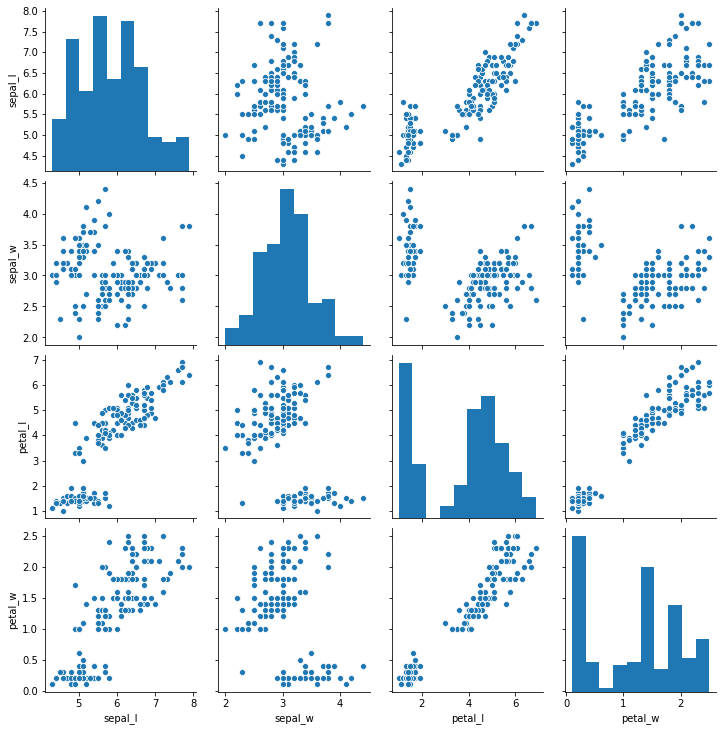

In [ ]:
import seaborn as sns
sns.pairplot(df2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
a=df2.columns
for i in a:
  
  scalar.fit(df2[[i]])
  df2[i+"1"]=scalar.transform(df2[[i]])

In [ ]:
df2

,sepal_l,sepal_w,petal_l,petal_w,sepal_l1,sepal_w1,petal_l1,petal_w1
0,5.1,3.5,1.4,0.2,0.222222,0.625000,0.067797,0.041667
1,4.9,3.0,1.4,0.2,0.166667,0.416667,0.067797,0.041667
2,4.7,3.2,1.3,0.2,0.111111,0.500000,0.050847,0.041667
3,4.6,3.1,1.5,0.2,0.083333,0.458333,0.084746,0.041667
4,5.0,3.6,1.4,0.2,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.666667,0.416667,0.711864,0.916667
146,6.3,2.5,5.0,1.9,0.555556,0.208333,0.677966,0.750000
147,6.5,3.0,5.2,2.0,0.611111,0.416667,0.711864,0.791667
148,6.2,3.4,5.4,2.3,0.527778,0.583333,0.745763,0.916667


In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df2[['sepal_l1','sepal_w1','petal_l1','petal_w1']])
    sse.append(km.inertia_)

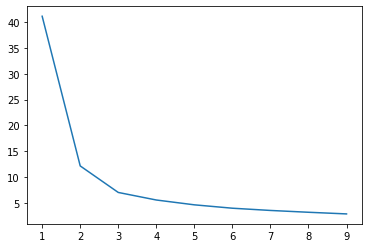

In [ ]:
plt.plot(k_rng,sse)

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df2[['sepal_l1','sepal_w1','petal_l1','petal_w1']])

In [ ]:
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
df2["cluster1"]=y_predicted

In [ ]:
df2

,sepal_l,sepal_w,petal_l,petal_w,sepal_l1,sepal_w1,petal_l1,petal_w1,cluster1
0,5.1,3.5,1.4,0.2,0.222222,0.625000,0.067797,0.041667,1
1,4.9,3.0,1.4,0.2,0.166667,0.416667,0.067797,0.041667,1
2,4.7,3.2,1.3,0.2,0.111111,0.500000,0.050847,0.041667,1
3,4.6,3.1,1.5,0.2,0.083333,0.458333,0.084746,0.041667,1
4,5.0,3.6,1.4,0.2,0.194444,0.666667,0.067797,0.041667,1
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.666667,0.416667,0.711864,0.916667,2
146,6.3,2.5,5.0,1.9,0.555556,0.208333,0.677966,0.750000,0
147,6.5,3.0,5.2,2.0,0.611111,0.416667,0.711864,0.791667,2
148,6.2,3.4,5.4,2.3,0.527778,0.583333,0.745763,0.916667,2


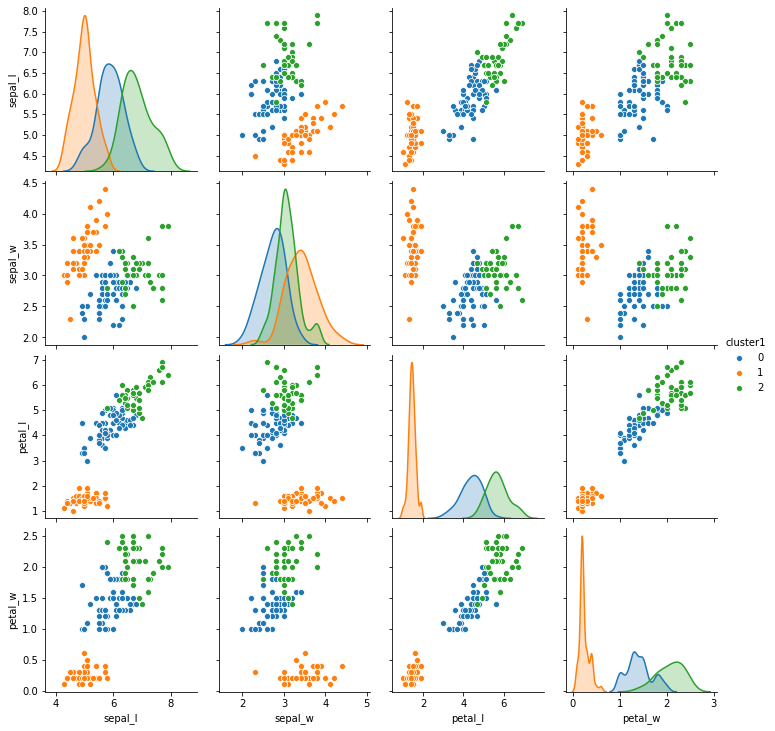

In [ ]:
sns.pairplot(df2[['sepal_l','sepal_w','petal_l','petal_w','cluster1']],hue='cluster1')

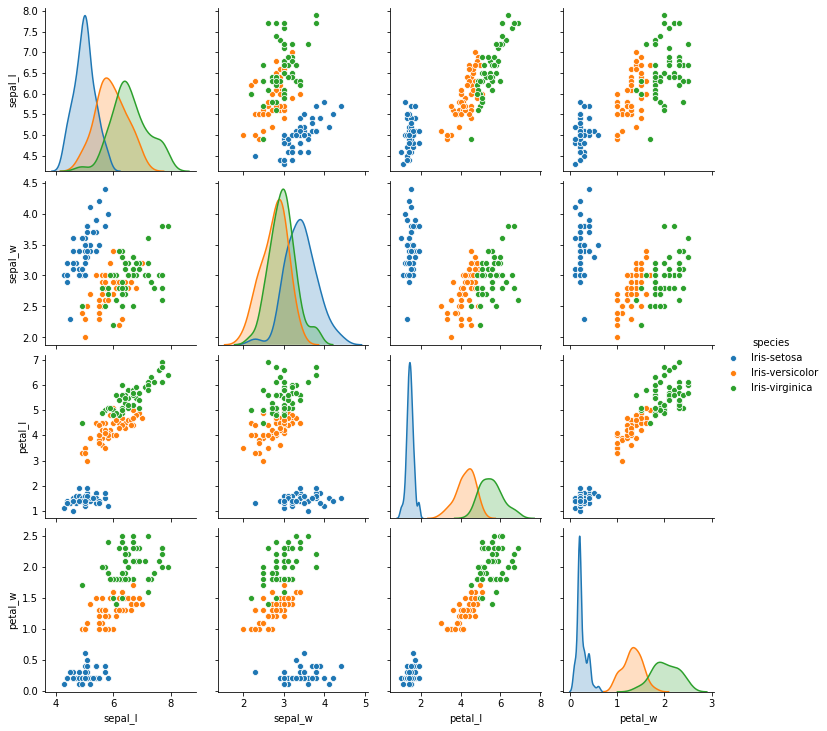

In [ ]:
sns.pairplot(df[['sepal_l','sepal_w','petal_l','petal_w','species']],hue='species')

In [ ]:
df2[["sepal_l"]]

,sepal_l
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0
...,...
145,6.7
146,6.3
147,6.5
148,6.2


In [ ]:
df2.columns

Index(['sepal_l', 'sepal_w', 'petal_l', 'petal_w'], dtype='object')

sepal_l
sepal_w
petal_l
petal_w
species
